In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


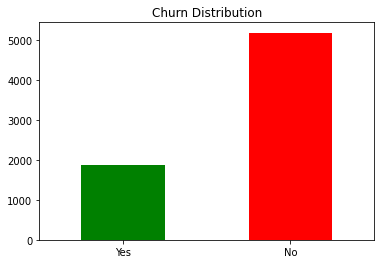

In [3]:
ax = df['Churn'].value_counts(sort=False).plot.bar(rot=0, color=['green', 'red'], title= "Churn Distribution")

In [4]:
df['Churn'].value_counts(sort=False)/len(df)*100

Yes    26.536987
No     73.463013
Name: Churn, dtype: float64

This shows that 26.54% percent data is having Churn. Data is imbalanced.

In [5]:
def plot_impact(feature):
    df_temp = df.groupby([feature, "Churn"]).size().reset_index(name="Count")
    ax = pd.pivot_table(df_temp, values='Count', columns=['Churn'], index=feature,
                        aggfunc=np.sum, fill_value=0).plot(kind='bar', title=feature +" impact on Churn",
                                                           color=['green', 'red'], rot=0)
    
def plot_stacked_impact(feature):
    df_temp = df.groupby([feature, "Churn"]).size().reset_index(name="Count")
    ax = pd.pivot_table(df_temp, values='Count', columns=['Churn'], index=feature,
                        aggfunc=np.sum, fill_value=0).plot(kind='bar', title=feature +" impact on Churn",
                                                           stacked=True, figsize=(15,5), 
                                                           color=['green', 'red'])

## Demographic KPIs

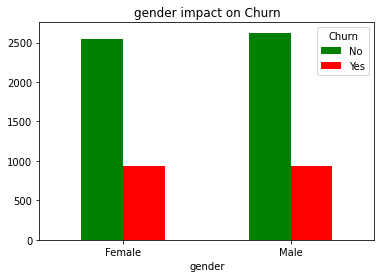

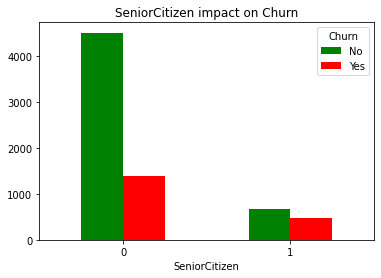

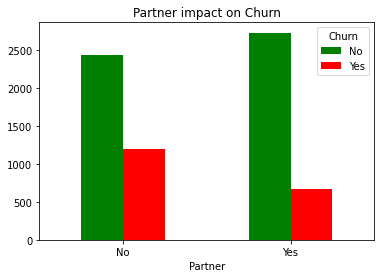

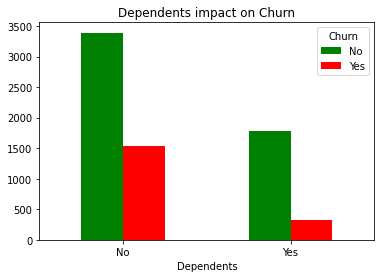

In [6]:
plot_impact('gender')
plot_impact('SeniorCitizen')
plot_impact('Partner')
plot_impact('Dependents')

### Conclusions:

1. Gender has no impact on churn. Both genders are in same proportion. This feature is not creating any impact on churn.
2. No. of senior citizens are less which is obvious. But churn rate is more among senior citizens. This might be because they would not be using the services anymore. Company should try to create some plans suitable for senior citizens.
3. Partner (having partner) doesn't have any comparable impact.
4. If a customer has dependents then the churn rate is low. Maybe the family would be using the telecom services & would be adapted to it. Hence the rate is less.

So the company should focus on senior citizens, & people who do not have dependents to reduce churn rate.

## Services offered KPIs

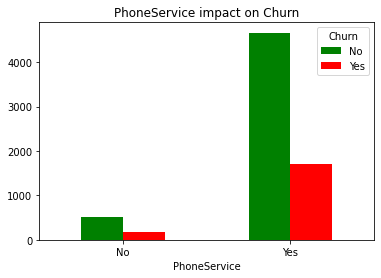

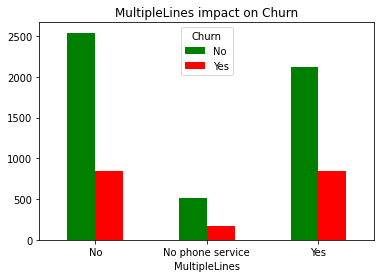

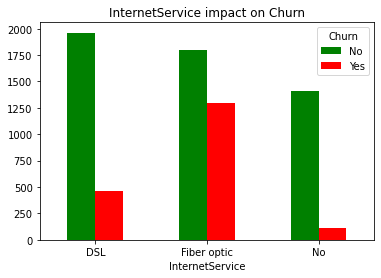

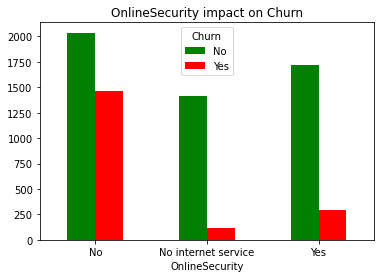

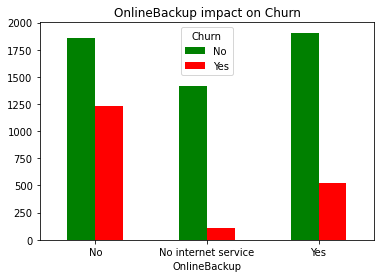

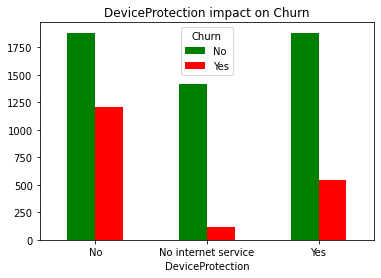

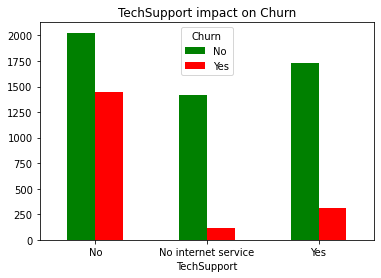

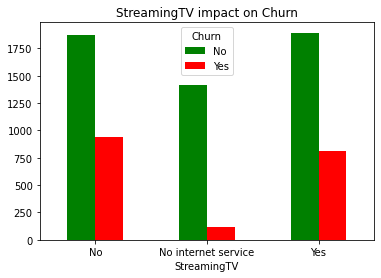

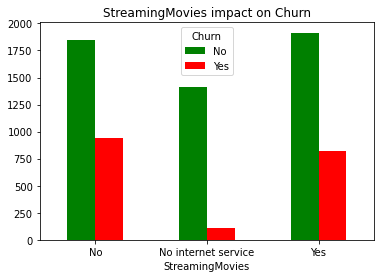

In [7]:
plot_impact('PhoneService')
plot_impact('MultipleLines')
plot_impact('InternetService')
plot_impact('OnlineSecurity')
plot_impact('OnlineBackup')
plot_impact('DeviceProtection')
plot_impact('TechSupport')
plot_impact('StreamingTV')
plot_impact('StreamingMovies')

### Conclusions:

1. It can be seen from the data that if customer doesn't have Phone Service, then the Multiple Lines feature has "No phone service" value.
2. Churn is independent of whether the customer is having Phone Service or not. The ratio is same. Majority have phone services.
3. A major understanding here is that, if a customer is using Fibre optics in Internet services, then they are prone to change the service (High churning). The reason for it needs to be investigated. Company's fibre optics service is having some major issues & customers are cancelling the service because of it. Maybe fibre optics plan would be costlier than it's competitors.
4. Online Security, Online Bachup, Device Protection, Tech support are important to reduce the churn rate of the company.
5. Having Streaming TV & Movies does not have impact on churn. Maybe because there would be different rate plans for each of these addional features & churn rates are same in all plans.

## Payment KPIs

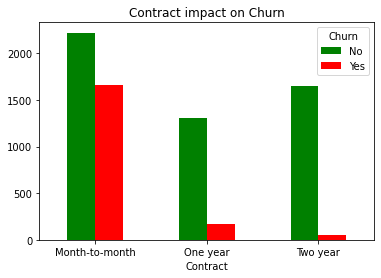

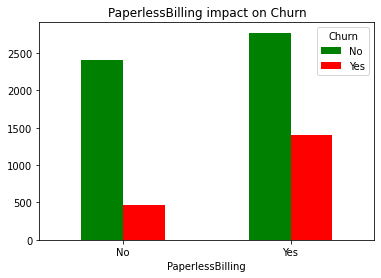

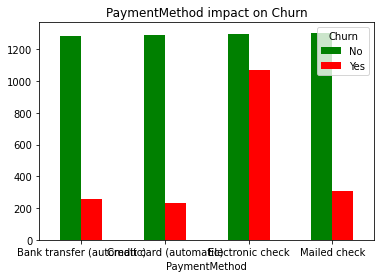

In [8]:
plot_impact('Contract')
plot_impact('PaperlessBilling')
plot_impact('PaymentMethod')

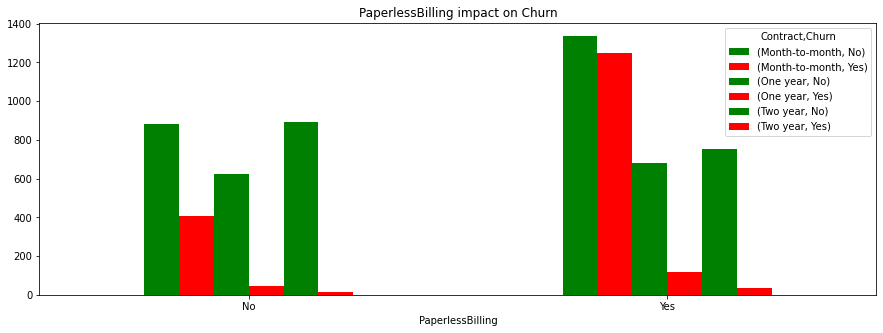

In [9]:
feature = 'PaperlessBilling'
df_temp = df.groupby([feature, "Contract", "Churn"]).size().reset_index(name="Count")
ax = pd.pivot_table(df_temp, values='Count', columns=["Contract", "Churn"], index=feature,
                    aggfunc=np.sum, fill_value=0).plot(kind='bar', title=feature +" impact on Churn",
                                                       rot=0, color=['green', 'red'], figsize=(15, 5))

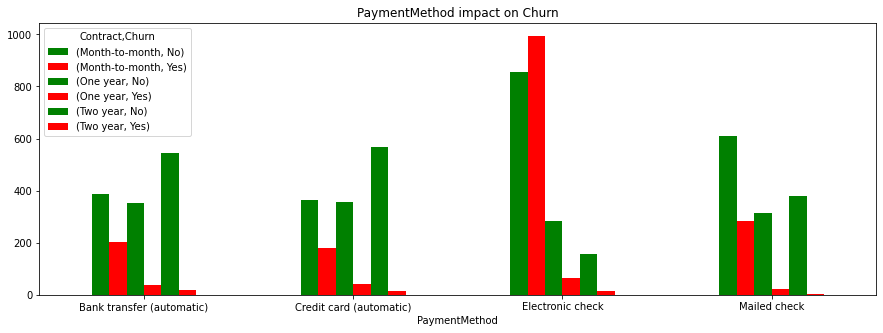

In [10]:
feature = 'PaymentMethod'
df_temp = df.groupby([feature, "Contract", "Churn"]).size().reset_index(name="Count")
ax = pd.pivot_table(df_temp, values='Count', columns=["Contract", "Churn"], index=feature,
                    aggfunc=np.sum, fill_value=0).plot(kind='bar', title=feature +" impact on Churn",
                                                       rot=0, color=['green', 'red'], figsize=(15, 5))


### Conclusions:

1. Customers who have 1 & 2 year plan are not leaving the service. Monthly plan customers are having high churning. Company must try to offer some quarter & 6 months plans at discounts to such customers to reduce churning.
2. Customers who do paperless biling are having higher churn rate. The reason for it needs to identified by checking whether paperless biling customers are monthly employee. Hence I dived more & realized my hypothesis is correct. Paperless billers who buy monthly plans churn more.
3. Customers who pay via Electronic Checks are in more churn rate. Maybe again they would be purchasing monthly subsciption. In the next plot, this was proved.

Main goal should be to sell a longer plan for monthly customers to reduce churn rate.

## Tenure & Charges KPIs

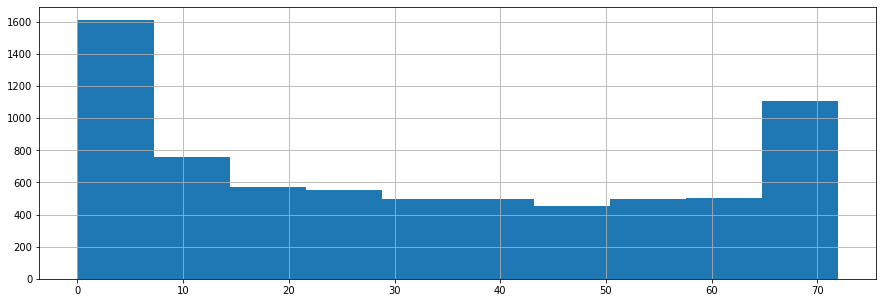

In [11]:
ax = df['tenure'].hist(figsize=(15,5))

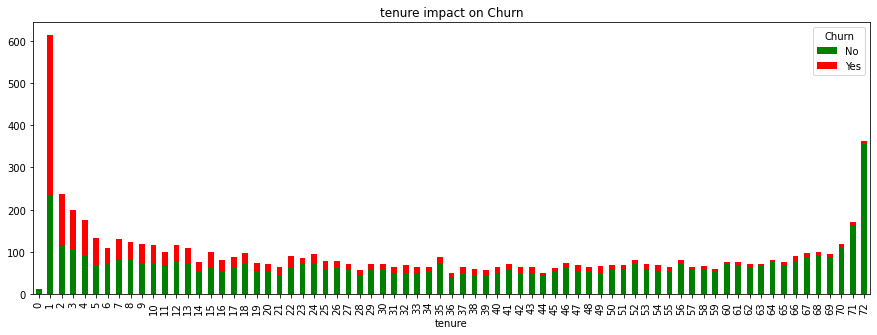

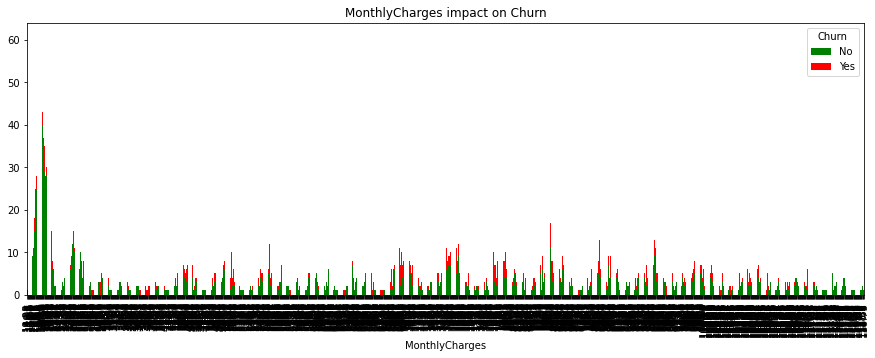

In [12]:
plot_stacked_impact('tenure')
plot_stacked_impact('MonthlyCharges')

### Conclusions:

1. From tenure chart, it is easily understood that the longer the customer stays, the less likely would the customer churn. So focus should be on retaining customers for longer period by selling 3 or 6 months plans.
2. Monthly charges graph is littler unclear, but it can be noticed that as price increases, churning also increases. So maybe yearly plans would be having some discounts & churn rate would be thus low. Also, if monthly plans have discounts, then churn rate is low.

## Preprocessing the data for model training

In [13]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
print("\nMissing values:\n", df.isnull().sum())

print("\nData Types:\n", df.dtypes)


Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod    

There is no missing values in any feature.\
Datatype of TotalCharges is object. Need to convert it into float. But there are some empty string.\
It can be related that: TotalCharges ~= MonthlyCharges * Tenure\
So this rule can be used to impute the missing values.

In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Null values in TotalCharges:", df['TotalCharges'].isna().sum())
df['TotalCharges'] = df['TotalCharges'].fillna(df['tenure'] * df['MonthlyCharges'])
print("Null values after imputation:", df['TotalCharges'].isna().sum())

Null values in TotalCharges: 11
Null values after imputation: 0


For all services KPIs, "No internet service" can be replaced with "No"\
Also customerID, gender, PhoneService can be dropped since it does not cause any impact.

## Addition of Date in the data

In [16]:
import calendar
import datetime
from dateutil.relativedelta import relativedelta

def random_dates(start, end, n):

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

def week_of_month(tgtdate):
    
    days_this_month = calendar.mdays[tgtdate.month]
    for i in range(1, days_this_month):
        d = datetime.datetime(tgtdate.year, tgtdate.month, i)
        if d.day - d.weekday() > 0:
            startdate = d
            break
    # now we can use the modulo 7 appraoch
    return (tgtdate - startdate).days //7 + 1

def start_date(df):
    
    return df['DateOfChurn'] - relativedelta(months=df['tenure'])

In [17]:
start = pd.to_datetime('2022-04-01')
end = pd.to_datetime('2022-06-30')

df['DateOfChurn'] = random_dates(start, end, df.shape[0])
df.loc[df['Churn'] == "No", 'DateOfChurn'] = pd.to_datetime('2022-07-01')

df['Month'] = df['DateOfChurn'].dt.month
df['WeekOfMonth'] = df['DateOfChurn'].apply(week_of_month)
df['StartDate'] = df.apply(start_date, axis=1)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DateOfChurn,Month,WeekOfMonth,StartDate
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2022-07-01 00:00:00,7,0,2022-06-01 00:00:00
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2022-07-01 00:00:00,7,0,2019-09-01 00:00:00
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2022-04-03 20:34:10,4,0,2022-02-03 20:34:10
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2022-07-01 00:00:00,7,0,2018-10-01 00:00:00
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2022-05-22 10:55:43,5,3,2022-03-22 10:55:43


#### Assignment of date feature

1. Let us consider this dataset is of 3 months. Today's date is 1st July, 2022. So dataset is of Apr, May, & June.
2. Now, let us consider that if a person has churned then "DateOfChurn" is any day in the 3 months time frame. If a person has not churned then the "DateOfChurn" for him is today, or say "not applicable".
3. Please note, if DateOfChurn is 1st July, 2022 then it means the customer has not churned.
4. Now month column is extracted from the date to understand how many customers churned in each of the month. This would help us in understanding churn rate on monthly basis.
5. Another feature called week of month is extracted. This would help us to increase granularity at weekly level within a month.
6. Increasing further granularity doesn't make much sense to the problem statement. But it can increased into days, & further into hours if needed by the business.
7. Lastly, considering Tenure column, to get the start date of customers.

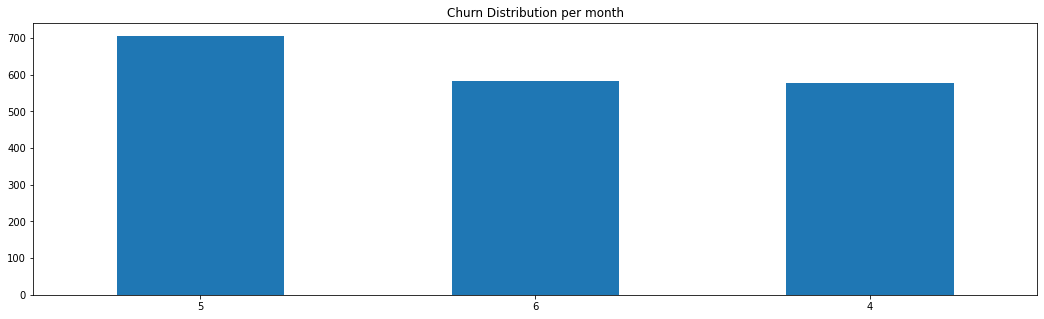

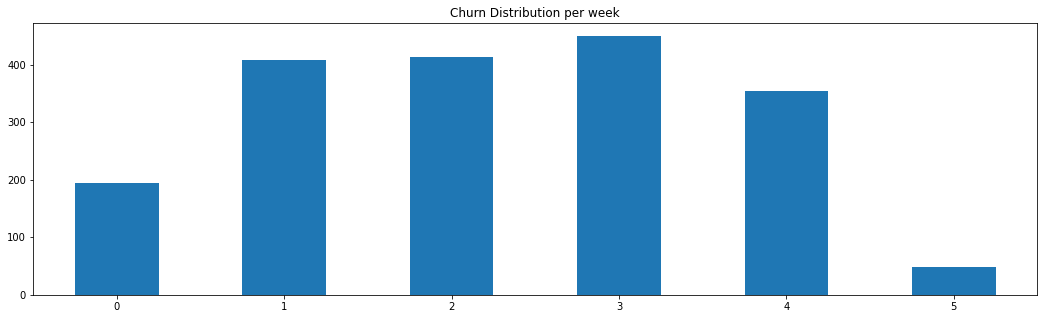

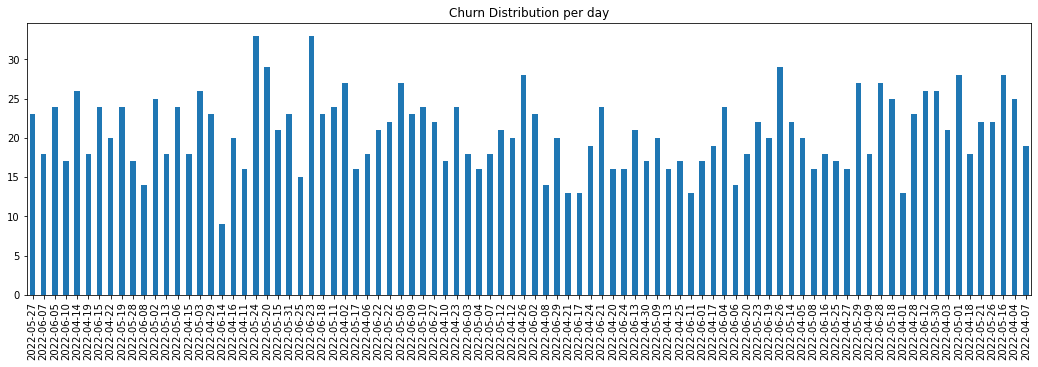

In [18]:
df[df['Churn'] == 'Yes']['Month'].value_counts().plot.bar(rot=0, title= "Churn Distribution per month", figsize=(18,5))
plt.show()

df[df['Churn'] == 'Yes']['WeekOfMonth'].value_counts(sort=False).plot.bar(rot=0, title= "Churn Distribution per week", figsize=(18,5))
plt.show()

temp = df[df['Churn'] == 'Yes']['DateOfChurn'].dt.date
temp.value_counts(sort=False).plot.bar(title= "Churn Distribution per day", figsize=(18, 5))
plt.show()

## Conclusions

1. The above graphs are showning the churn distribution in 3 levels of granularity.
2. Since the dates are assigned randomly, it is hard to figure out any relation wrt to churn. Hence I am not considering the date features for modeling.
3. However, if the data has accurate date informations then the Month & Week can be a crucial component for churn prediction.

## Feature selection & transformation

In [19]:
df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies']] = df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                             'TechSupport', 'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

df.drop(['customerID','gender','PhoneService', 'DateOfChurn', 'Month',
         'MultipleLines', 'TotalCharges', 'WeekOfMonth', 'StartDate',
         'StreamingTV', 'StreamingMovies'], axis=1, inplace=True)

df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,No
2,0,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,0,No,No,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,No
4,0,No,No,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


Dropping customerID, Gender, PhoneService, MultipleLines because they are giving any impact on churn.\
Dropping TotalCharges because it is a product of Tenure & Monthly charges. Keeping monthly charges because it gives an insight regarding discounts being offered.

In [20]:
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

#Encoding other binary category
binary_list = ['Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'PaperlessBilling', 'Churn']
df[binary_list] = df[binary_list].apply(binary_map)

df['Contract'] = df['Contract'].replace({'One year': 'Year', 'Two year': 'Year'})

df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,DSL,0,1,0,0,Month-to-month,1,Electronic check,29.85,0
1,0,0,0,34,DSL,1,0,1,0,Year,0,Mailed check,56.95,0
2,0,0,0,2,DSL,1,1,0,0,Month-to-month,1,Mailed check,53.85,1
3,0,0,0,45,DSL,1,0,1,1,Year,0,Bank transfer (automatic),42.30,0
4,0,0,0,2,Fiber optic,0,0,0,0,Month-to-month,1,Electronic check,70.70,1


In [21]:
df = pd.get_dummies(df, drop_first=True)
column_to_move = df.pop("Churn")
df.insert(len(df.columns), "Churn", column_to_move)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,InternetService_Fiber optic,InternetService_No,Contract_Year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,0,1,0,1,0,0,1,29.85,0,0,0,0,1,0,0
1,0,0,0,34,1,0,1,0,0,56.95,0,0,1,0,0,1,0
2,0,0,0,2,1,1,0,0,1,53.85,0,0,0,0,0,1,1
3,0,0,0,45,1,0,1,1,0,42.30,0,0,1,0,0,0,0
4,0,0,0,2,0,0,0,0,1,70.70,1,0,0,0,1,0,1


In [22]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,InternetService_Fiber optic,InternetService_No,Contract_Year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
SeniorCitizen,1.00,0.02,-0.21,0.02,-0.04,0.07,0.06,-0.06,0.16,0.22,0.26,-0.18,-0.14,-0.02,0.17,-0.15,0.15
Partner,0.02,1.00,0.45,0.38,0.14,0.14,0.15,0.12,-0.01,0.10,0.00,0.00,0.28,0.08,-0.08,-0.10,-0.15
Dependents,-0.21,0.45,1.00,0.16,0.08,0.02,0.01,0.06,-0.11,-0.11,-0.17,0.14,0.23,0.06,-0.15,0.06,-0.16
tenure,0.02,0.38,0.16,1.00,0.33,0.36,0.36,0.32,0.01,0.25,0.02,-0.04,0.65,0.23,-0.21,-0.23,-0.35
OnlineSecurity,-0.04,0.14,0.08,0.33,1.00,0.28,0.28,0.35,-0.00,0.30,-0.03,-0.33,0.25,0.12,-0.11,-0.08,-0.17
OnlineBackup,0.07,0.14,0.02,0.36,0.28,1.00,0.30,0.29,0.13,0.44,0.17,-0.38,0.16,0.09,-0.00,-0.17,-0.08
DeviceProtection,0.06,0.15,0.01,0.36,0.28,0.30,1.00,0.33,0.10,0.48,0.18,-0.38,0.23,0.11,-0.00,-0.19,-0.07
TechSupport,-0.06,0.12,0.06,0.32,0.35,0.29,0.33,1.00,0.04,0.34,-0.02,-0.34,0.29,0.12,-0.11,-0.09,-0.16
PaperlessBilling,0.16,-0.01,-0.11,0.01,-0.00,0.13,0.10,0.04,1.00,0.35,0.33,-0.32,-0.17,-0.01,0.21,-0.21,0.19
MonthlyCharges,0.22,0.10,-0.11,0.25,0.30,0.44,0.48,0.34,0.35,1.00,0.79,-0.76,-0.06,0.03,0.27,-0.38,0.19


## Feature Selection (Continued)

In [23]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost as xgb

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Churn'], axis=1),
                                                    df['Churn'], test_size=0.2, random_state=50)

sc = MinMaxScaler()
X_train[['tenure', 'MonthlyCharges']] = sc.fit_transform(X_train[['tenure', 'MonthlyCharges']])
X_test[['tenure', 'MonthlyCharges']] = sc.transform(X_test[['tenure', 'MonthlyCharges']])

In [27]:
lr = LogisticRegression()
selector = RFE(estimator=lr, n_features_to_select=6)
selector.fit(X_train, y_train)

print("Features selected using Logistic Regression as estimator")
print(df.iloc[:, np.append(selector.support_, True)].columns)

rfc = RandomForestClassifier()
selector = RFE(estimator=rfc, n_features_to_select=6)
selector.fit(X_train, y_train)

print("Features selected using Random Forest Classifier as estimator")
print(df.iloc[:, np.append(selector.support_, True)].columns)

Features selected using Logistic Regression as estimator
Index(['tenure', 'OnlineSecurity', 'MonthlyCharges',
       'InternetService_Fiber optic', 'InternetService_No', 'Contract_Year',
       'Churn'],
      dtype='object')
Features selected using Random Forest Classifier as estimator
Index(['tenure', 'PaperlessBilling', 'MonthlyCharges',
       'InternetService_Fiber optic', 'Contract_Year',
       'PaymentMethod_Electronic check', 'Churn'],
      dtype='object')


### Feature Selection results:

1. Used recursive feautre elimination algorithm with Random Forest Classifier & Logistic regression as estimator. There is no much difference in the selected features by both algorithms. Let us go ahead with features selected by random forest to reduce unwanted biasing.
2. Final 6 features selected are:\
 i.   "tenure"\
 ii.  "OnlineSecurity"\
 iii. "Monthly Charges"\
 iv.  "Internet Service"\
 v.   "Contract period"\
 vi.  "Payment method (whether electronic or not)".

## Model Training

In [28]:
X_train_new = X_train.iloc[:, selector.support_]
X_test_new = X_test.iloc[:, selector.support_]

In [29]:
def plot_results(classifier):
    
    plot_confusion_matrix(classifier, X_test_new, y_test)  
    
    y_pred = classifier.predict(X_test_new)
    acc_score = accuracy_score(y_test, y_pred)
    print("accuracy: ", acc_score)
    pre_score = precision_score(y_test, y_pred)
    print("precision: ", pre_score)
    rec_score = recall_score(y_test, y_pred)                            
    print("recall: ", rec_score)
    f_score = f1_score(y_test, y_pred, average='weighted')
    print("f1_score: ", f_score)
    f2_score = fbeta_score(y_test, y_pred, average='weighted', beta=2)
    print("f2_score: ", f2_score)

### Logistic Regression

accuracy:  0.7885024840312278
precision:  0.6107594936708861
recall:  0.5244565217391305
f1_score:  0.7830399254886514
f2_score:  0.7860415267909522
Co-efficients:  [[-2.5270303   0.44451154  1.36604538  0.6402521  -1.08717678  0.49223818]]


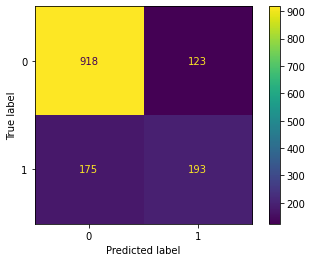

In [30]:
lr = LogisticRegression()
lr.fit(X_train_new, y_train )
  
plot_results(lr)

print("Co-efficients: ", lr.coef_)

accuracy:  0.7927608232789212
precision:  0.6241830065359477
recall:  0.5190217391304348
f1_score:  0.7862255130326891
f2_score:  0.7897515753719376


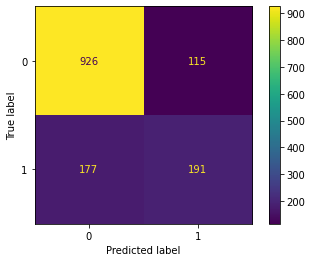

In [31]:
svc = SVC()
svc.fit(X_train_new, y_train )
  
plot_results(svc)


### Naive Bayes

accuracy:  0.7629524485450674
precision:  0.5352697095435685
recall:  0.7010869565217391
f1_score:  0.7719828719453646
f2_score:  0.7652536813212436


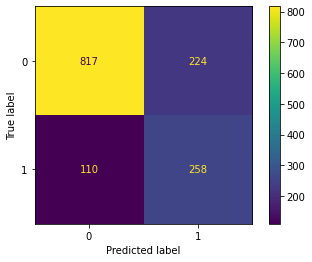

In [32]:
gb = GaussianNB()
gb.fit(X_train_new, y_train)

plot_results(gb)

### Decision Tree Classifier

accuracy:  0.7352732434350603
precision:  0.4932249322493225
recall:  0.4945652173913043
f1_score:  0.7353892353033444
f2_score:  0.7353195494814648


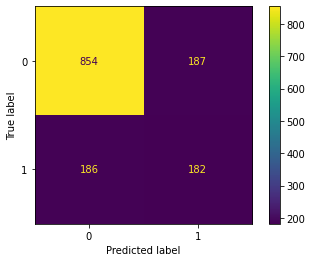

In [33]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train_new, y_train)

plot_results(dtc)

### Random Forest Classifier

accuracy:  0.772888573456352
precision:  0.5697674418604651
recall:  0.532608695652174
f1_score:  0.770354934986796
f2_score:  0.7718180467949


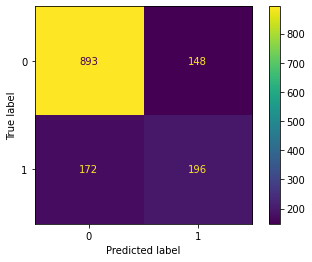

In [34]:
rfc = RandomForestClassifier()

rfc.fit(X_train_new, y_train)

plot_results(rfc)

### XGBoost

accuracy:  0.7799858055358411
precision:  0.5873493975903614
recall:  0.529891304347826
f1_score:  0.7761981066963003
f2_score:  0.7783405610691658


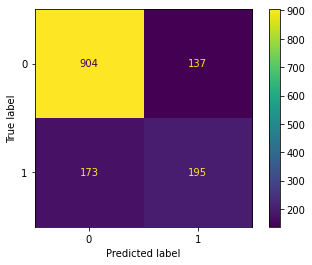

In [35]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train_new, y_train)

plot_results(xgb_cl)

### Conclusions:

1. Results are pretty same in all 5 algorithms.
2. Recall is an important parameter for us. So let us consider F2 score as evaluation metric.
3. F2 score give more weigth to Recall & less to Precision.

## Hyper Parameter Tuning with Stratified K Fold cross validation

### Linear Regression

In [36]:
# define search space
from scipy.stats import loguniform
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

# define model
model = LogisticRegression()

# define evaluation
cv = StratifiedKFold(n_splits=10, random_state=50, shuffle=True)

# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='f1_weighted', n_jobs=-1, cv=cv, random_state=1)

In [37]:
search.fit(X_train_new, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
                   estimator=LogisticRegression(), n_iter=500, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029B7F0F2EB0>,
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=1, scoring='f1_weighted')

{'C': 0.47987639922798775, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy:  0.7892122072391767
precision:  0.61198738170347
recall:  0.5271739130434783
f1_score:  0.7838853289792976
f2_score:  0.7868154220722238
Co-efficients:  [[-2.45035363  0.44408645  1.26288511  0.67057414 -1.09554302  0.49529997]]


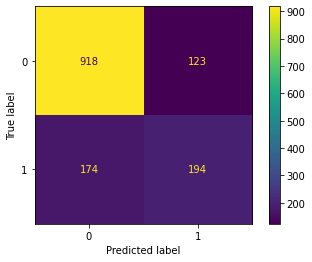

In [38]:
print(search.best_params_)
lr = LogisticRegression(**search.best_params_)
lr.fit(X_train_new, y_train )
  
plot_results(lr)

print("Co-efficients: ", lr.coef_)

### Random Forest Classifier

In [45]:
space = {
    'bootstrap': [True],
    'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 3],
    'min_samples_split': [2, 4],
    'n_estimators': [100, 200]
}

# define model
model = RandomForestClassifier()

# define evaluation
cv = StratifiedKFold(n_splits=10, random_state=50, shuffle=True)

# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='f1_weighted', n_jobs=-1, cv=cv, random_state=1)

In [46]:
search.fit(X_train_new, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=500, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [80, 90],
                                        'max_features': [2, 3],
                                        'min_samples_leaf': [1, 3],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': [100, 200]},
                   random_state=1, scoring='f1_weighted')

{'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 90, 'bootstrap': True}
accuracy:  0.7963094393186657
precision:  0.6231003039513677
recall:  0.5570652173913043
f1_score:  0.7924834649373175
f2_score:  0.7946198767876893


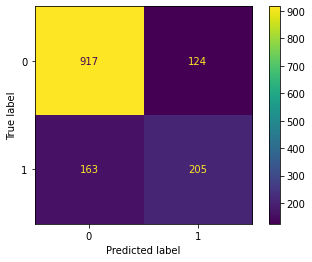

In [49]:
print(search.best_params_)
rfc = RandomForestClassifier(**search.best_params_)
rfc.fit(X_train_new, y_train )
  
plot_results(rfc)

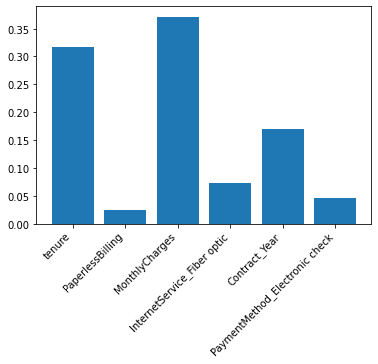

In [64]:
plt.bar(X_train_new.columns.to_list(), rfc.feature_importances_)
plt.xticks(rotation=45, ha='right')
plt.show()

### Conclusions:

1. Random forest classifier has better results with hyperparameter tuning.
2. Feature importance plot of Random Forest shows the importance of each feature for reducing churn.

## Saving models

Saving Random forest with hyper parameters tuned.

In [67]:
import joblib
scaler_filename = "scaler.pkl"
joblib.dump(sc, scaler_filename) 

model_filename = "random_forest_classifier.pkl"
joblib.dump(rfc, model_filename) 

['random_forest_classifier.pkl']